In [43]:
#import necessary modules
from pyhdf import SD
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [95]:
filename1='MOD21.A2016001.1515.006.2017215165634.hdf'
hdf=SD.SD(filename1)
hdf.datasets()

{'Emis_29': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  21,
  4),
 'Emis_29_err': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  23,
  8),
 'Emis_31': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  21,
  5),
 'Emis_31_err': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  23,
  9),
 'Emis_32': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  21,
  6),
 'Emis_32_err': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  23,
  10),
 'Emis_ASTER': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  21,
  12),
 'LST': (('swath_lines_1km:MOD_Swath_LST', 'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  23,
  2),
 'LST_err': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
 

In [74]:
pwvds=hdf.select('PWV')

In [102]:
pwvds.attributes()

{'_FillValue': 0,
 '_Offset': 0.0,
 '_Scale': 0.001,
 'coordsys': 'cartesian',
 'format': 'scaled',
 'long_name': 'Water vapor',
 'units': 'cm',
 'valid_range': [0.0, 65535.0]}

In [75]:
units=pwvds.attributes(full=1)['units'][0]

In [109]:
pwv=pwvds[:]*pwvds.attributes()['_Scale']

In [110]:
pwv

array([[ 3.408,  3.405,  3.401, ...,  2.989,  2.991,  2.991],
       [ 3.42 ,  3.417,  3.413, ...,  2.991,  2.993,  2.994],
       [ 3.432,  3.429,  3.425, ...,  2.993,  2.995,  2.996],
       ..., 
       [ 5.788,  5.796,  5.803, ...,  5.994,  5.995,  5.996],
       [ 5.783,  5.791,  5.798, ...,  5.997,  5.999,  6.   ],
       [ 5.778,  5.786,  5.793, ...,  6.001,  6.002,  6.004]])

In [112]:
pwv.min()

1.087

In [63]:
latitude=hdf.select('Latitude')[:]

In [69]:
longitude=hdf.select('Longitude')[:]

{-135.0: ([<matplotlib.lines.Line2D at 0x7fb1c80e9358>],
  [<matplotlib.text.Text at 0x7fb1c8014400>]),
 -90.0: ([<matplotlib.lines.Line2D at 0x7fb1c80e9ba8>],
  [<matplotlib.text.Text at 0x7fb1c80148d0>]),
 -45.0: ([<matplotlib.lines.Line2D at 0x7fb1c80c83c8>],
  [<matplotlib.text.Text at 0x7fb1c8014e10>]),
 0.0: ([<matplotlib.lines.Line2D at 0x7fb1c80c8ba8>],
  [<matplotlib.text.Text at 0x7fb1c8279390>]),
 45.0: ([<matplotlib.lines.Line2D at 0x7fb1c7ff33c8>],
  [<matplotlib.text.Text at 0x7fb1c82798d0>]),
 90.0: ([<matplotlib.lines.Line2D at 0x7fb1c7ff3ba8>],
  [<matplotlib.text.Text at 0x7fb1c8279e10>]),
 135.0: ([<matplotlib.lines.Line2D at 0x7fb1c80053c8>],
  [<matplotlib.text.Text at 0x7fb1c8289390>]),
 180.0: ([<matplotlib.lines.Line2D at 0x7fb1c8005ba8>],
  [<matplotlib.text.Text at 0x7fb1c82898d0>])}

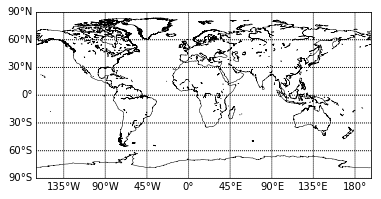

In [57]:
nlev=10
levels = 600*np.linspace(0,1,10)

In [58]:
colors=plt.cm.Blues(np.linspace(0,1,10))

In [59]:
cmap = mpl.colors.ListedColormap(colors)

In [60]:
cmap.N

10

In [61]:
bounds = np.arange(nlev)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [89]:
pwv.shape

(2030, 1354)

In [78]:
Z = np.zeros(pwv.shape, dtype=np.float64)
for j in np.arange(len(levels)-1):
    Z[np.logical_and(pwv >= levels[j], pwv < levels[j+1])] = j  
Z[pwv >= levels[-1]] = len(levels)

In [113]:
Z

array([[ 10.,  10.,  10., ...,  10.,  10.,  10.],
       [ 10.,  10.,  10., ...,  10.,  10.,  10.],
       [ 10.,  10.,  10., ...,  10.,  10.,  10.],
       ..., 
       [ 10.,  10.,  10., ...,  10.,  10.,  10.],
       [ 10.,  10.,  10., ...,  10.,  10.,  10.],
       [ 10.,  10.,  10., ...,  10.,  10.,  10.]])

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3420: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


TypeError: Dimensions of C (2030, 1354) are incompatible with X (271) and/or Y (406); see help(pcolormesh)

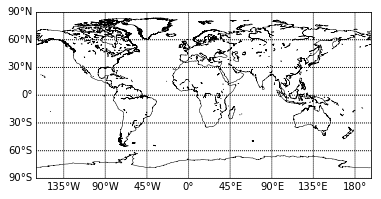

In [80]:
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat = 90,
            llcrnrlon=-165, urcrnrlon = 197)

m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 180., 45.), labels=[0, 0, 0, 1])
m.pcolormesh(longitude, latitude, Z, latlon=True, cmap=cmap, norm=norm)

In [86]:
help(m.pcolormesh)

Help on method pcolormesh in module mpl_toolkits.basemap:

pcolormesh(x, y, data, **kwargs) method of mpl_toolkits.basemap.Basemap instance
    Make a pseudo-color plot over the map
    (see matplotlib.pyplot.pcolormesh documentation).
    
    If ``latlon`` keyword is set to True, x,y are intrepreted as
    longitude and latitude in degrees.  Data and longitudes are
    automatically shifted to match map projection region for cylindrical
    and pseudocylindrical projections, and x,y are transformed to map
    projection coordinates. If ``latlon`` is False (default), x and y
    are assumed to be map projection coordinates.
    
    Extra keyword ``ax`` can be used to override the default axis instance.
    
    Other \**kwargs passed on to matplotlib.pyplot.pcolormesh.



In [88]:
longitude.shape

(406, 271)

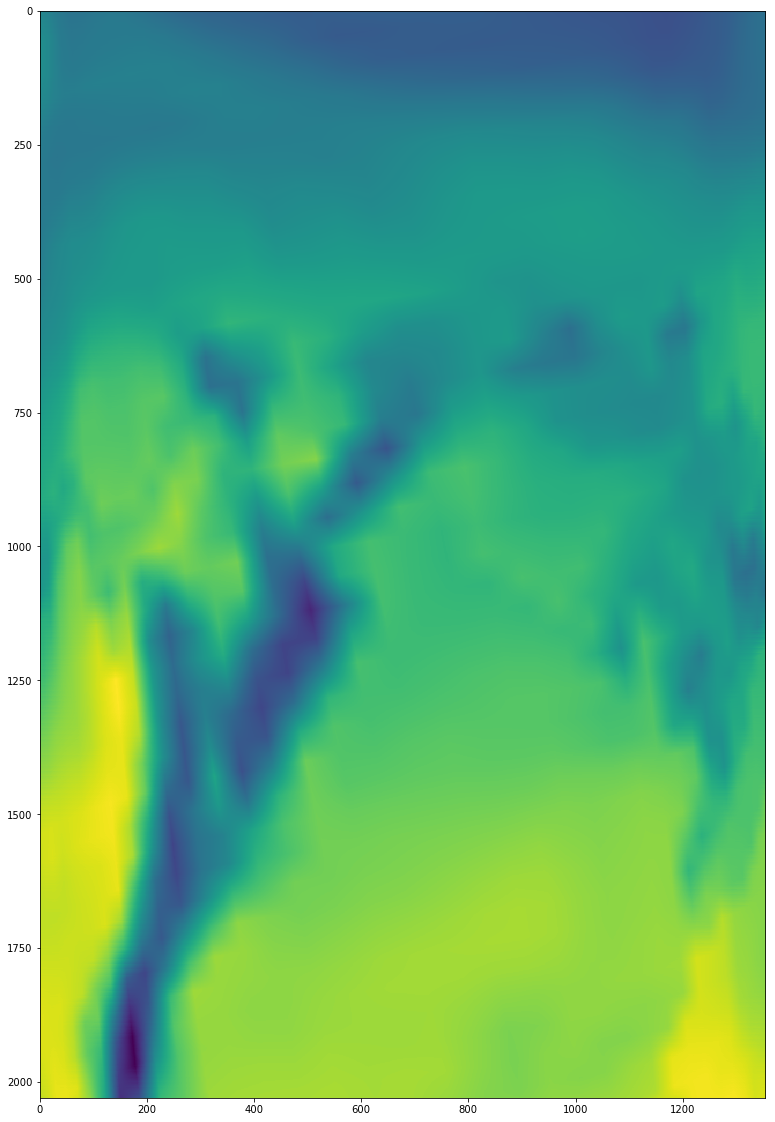

In [115]:
plt.figure(figsize=(20,20))
plt.imshow(pwv)

In [117]:
longitude

array([[-79.50370026, -79.28507996, -79.07454681, ..., -58.57659912,
        -58.37253189, -58.16077042],
       [-79.51185608, -79.29322815, -79.08270264, ..., -58.59421921,
        -58.39049149, -58.17909241],
       [-79.51960754, -79.30105591, -79.09060669, ..., -58.60103989,
        -58.3970871 , -58.18544388],
       ..., 
       [-82.91143799, -82.70375824, -82.50369263, ..., -62.74380493,
        -62.54336166, -62.33526993],
       [-82.91690063, -82.70944214, -82.50960541, ..., -62.74939346,
        -62.54870987, -62.34033585],
       [-82.92966461, -82.72203064, -82.5220108 , ..., -62.76044464,
        -62.56045532, -62.35211945]], dtype=float32)